In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

- 베르누이, 이항분포 
- scipy에서 가지고와서 다양하게 만들 수 있다.

- 베르누이
- from scipy.stats import bernoulli
- 메서드 정리
    - 확률질량함수 pmf(k,p) k가 0또는1 (성공, 실패), p 특정확률
    - 누적분포함수cdf(동일)
    - 랜덤변수샘플링 rvs(p,size) p는 특정확률, size 사이즈 크기 성공확률이 p인 베르누이분포의 랜덤 변수 생성가능
    - mean(p) 확률
    - var(p)
    - std(p)

<BarContainer object of 2 artists>

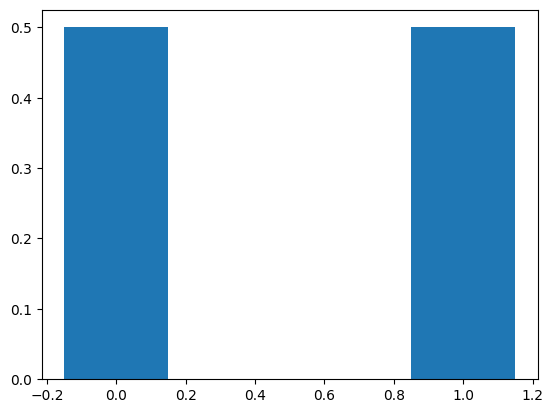

In [8]:
p = 0.5

# 성공 실패 이진
x = [0,1] # 0 유지, 1 이탈 , #0 정상, 1 사기 


pmf = bernoulli.pmf(x,p)
plt.bar(x, pmf, width=0.3)

<BarContainer object of 2 artists>

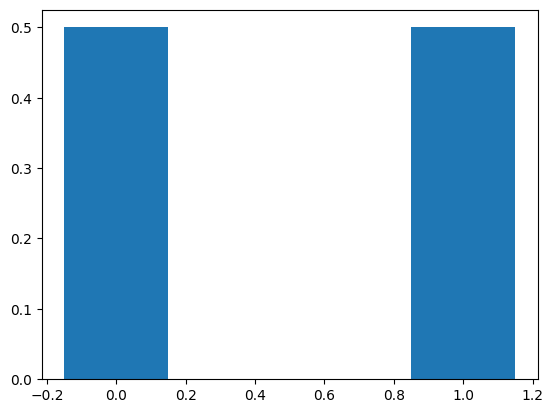

In [12]:
p = 0.5

# 성공 실패 이진
x = [0,1] # 0 유지, 1 이탈 , #0 정상, 1 사기 


pmf = bernoulli.pmf(x,p)
plt.bar(x, pmf, width=0.3)

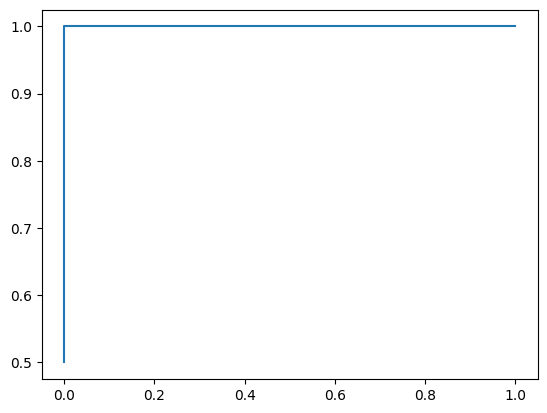

In [13]:
#cdf 계산

cdf =bernoulli.cdf(x,p)

plt.step(x,cdf)

(array([49942., 50058.]),
 array([-0.5,  0.5,  1.5]),
 <BarContainer object of 2 artists>)

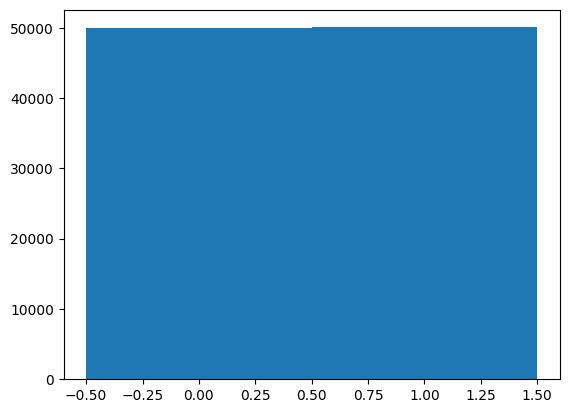

In [21]:
#랜덤샘플링으로 생성 시각화

rvs =bernoulli.rvs(p, size = 100000)
plt.hist(rvs, bins =[-0.5, 0.5, 1.5])

- 이항분포 
- 베르누이를 n번 시행
- binom 쉽게 만들 수 있다.

- binom
    - pmf( k, n , p ) p 확률, n 특정 시행횟수, 'k'번 성공할 확률 
    - cdf( k , n ,p) 
    - sf(k, n ,p ) 생존함수
    - ppf(q, n p)  퍼센트 포인트 함수 , 역누적분포함수 , 누적확률 q에 대해서 해당하는 이항분포 성공횟수 k 계산
    - rvs(n, p, size) 랜덤변수샘플링
    - 기타통계치 동일

In [22]:
from scipy.stats import binom

In [30]:
n = 2 # 시행횟수
p = 0.5 # 성공확률

#랜덤 샘플 생성 및 시각화

rvs = binom.rvs(n,p,size=1000)

In [31]:
rvs

array([1, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1,
       0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 0,
       2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0,
       0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0,
       1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 0, 2,
       2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       2, 1, 1, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 2,
       1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1,
       1, 2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0,

### 실제 데이터셋을 가지고 와서 어떤 식으로 분석하면 좋을까?
- 생존율, 이탈율 예측 분석 진행한다.

In [32]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [36]:
data = load_breast_cancer()

X = data.data
y = data.target

In [38]:
len(y)

569

In [40]:
## 실제 데이터셋의 확률을 가지고 베르누이 분포라 가정했으니
## 베르누이분포 가정하에 시뮬레이션을 돌리면 동일한 값이 나오게 되는지?

p = np.mean(y) #유방암데이터셋에서 0.63 정도가 확률 양성일 확률

In [42]:
simulated_data =bernoulli.rvs(p, size=(len(y)))

In [43]:
simulated_data

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,

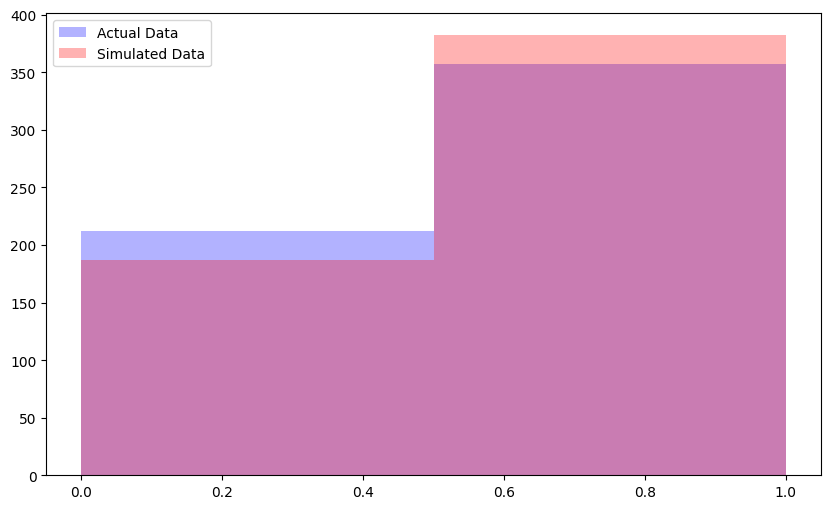

In [45]:
## 실제 데이터와 비교 
plt.figure(figsize=(10,6))
plt.hist(y, bins=2,alpha=0.3,color='b', label='Actual Data')
plt.hist(simulated_data, bins=2,alpha=0.3,color='r', label='Simulated Data')
plt.legend()
plt.show()

- 가상의 고객이 이탈에 대해서 이탈율 샘플링
- 가상의 고객 데이터를 만들어야 한다.

- 고객의 베르누이분포를 통해서 이탈율에 대한 것을 시각화

In [53]:
from sklearn.datasets import make_classification # 이진분류데이터를 쉽게 만들 수 있다.

#가상의 데이터셋을 만들기!
X, y = make_classification(n_samples=1000, n_features=10, n_classes =2, random_state=111)


# 이탈확률 예측 
p = np.mean(y)

# 베르누이 분포 데이터 생성 
simulated_data =bernoulli.rvs(p, size=(len(y)))

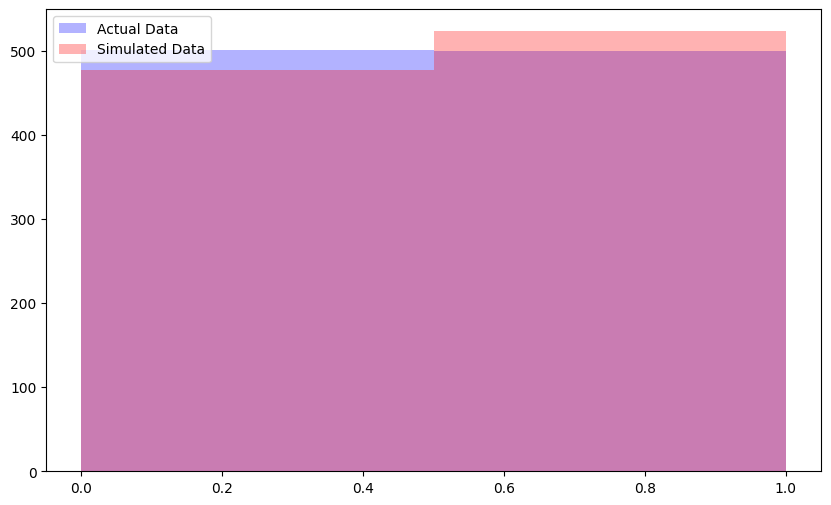

In [55]:
## 실제 데이터와 비교 
plt.figure(figsize=(10,6))
plt.hist(y, bins=2,alpha=0.3,color='b', label='Actual Data')
plt.hist(simulated_data, bins=2,alpha=0.3,color='r', label='Simulated Data')
plt.legend()
plt.show()

- 이항분포가 시행횟수를 늘리면 -> 정규분포화 처럼 된다. np >=5  이상이면

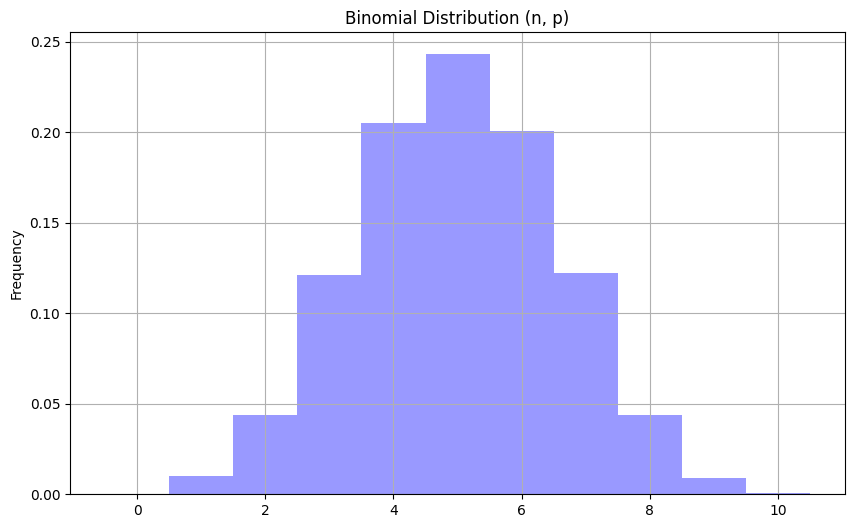

In [67]:
# 이항분포 설정

n_trials = 10
p = 0.5
n_simulations = 10000 #시뮬레이션

#이항분포 샘플
binom_samples =binom.rvs(n = n_trials, p= p, size= n_simulations)

#데이터 시각화로 확인

plt.figure(figsize=(10,6))
plt.hist(binom_samples, bins = np.arange(n_trials + 2)- 0.5, density= True, alpha= 0.4, color ='b')
plt.title('Binomial Distribution (n, p)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [69]:
## 타이타닉 데이터셋으로 생존여부 확률 계산
import seaborn as sns
df=sns.load_dataset('titanic')

In [72]:
survived=df['survived'].dropna()

In [74]:
p = np.mean(survived)

In [75]:
p

0.3838383838383838

In [76]:
## 모의 데이터셋 만들기
# 베르누이 분포 데이터 생성 
simulated_data =bernoulli.rvs(p, size=(len(survived)))

In [78]:
simulated_data

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

### 이항분포만 배우고 끝났지만
- 초기하분포, 포아송분포 등이 있다.
- 하루동안에 전화통화 등 이러한 현상에 대해서 분포로 나타낸 것
- 데이터 분석하실 때 
- 데이터들이 어떤 분포를 보이고 있고, 어떤 도메인으로 지금 만들어진 데이터인지 이 부분을 꼭 잘 이해하고 접근해야 한다.
- 분포에 따라서 분석하는 방법들이 다를 것
- 이진 분류는 이항분포 개념으로 접근하는데, 회귀 등의 연속형은 또 다르게 분석을 해야 한다.
- 이산, 연속에 따라서 뒤에 배울 데이터 분석방법론들이 다 다를 것